## AirBnB price trend

In [22]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
pd.set_option("display.max.columns", None)
pd.set_option('min_rows', 10)

### 1.1 Load the data

In [24]:
df_boston_calendar = pd.read_csv('boston\calendar.csv', sep=',')
df_seattle_calendar = pd.read_csv('seattle\calendar.csv', sep=',')

In [25]:
df_boston_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


### 1.2 Process the data

In [26]:
# combine calendars of Boston and Seattle
df_calendar = pd.concat([df_boston_calendar, df_seattle_calendar], keys=['boston', 'seattle'], names=['city','i'], sort=False)
df_calendar.rename(columns={'listing_id': 'id'}, inplace=True)
df_calendar.head()

id        date available price
city   i                                      
boston 0  12147973  2017-09-05         f   NaN
       1  12147973  2017-09-04         f   NaN
       2  12147973  2017-09-03         f   NaN
       3  12147973  2017-09-02         f   NaN
       4  12147973  2017-09-01         f   NaN

In [27]:
df_calendar.reset_index(inplace=True)

# drop available='f'
df_calendar.dropna(inplace=True)
df_calendar.drop(axis=1, columns=['i'], inplace=True)
df_calendar.head()

,city,id,date,available,price
365,boston,3075044,2017-08-22,t,$65.00
366,boston,3075044,2017-08-21,t,$65.00
367,boston,3075044,2017-08-20,t,$65.00
368,boston,3075044,2017-08-19,t,$75.00
369,boston,3075044,2017-08-18,t,$75.00


In [28]:
df_calendar.shape

(1577579, 5)

In [29]:
# convert string price to numeric
df_calendar.replace('[$,]', '', regex=True, inplace=True)
df_calendar.price = df_calendar.price.astype(float)

# convert string date to actual date
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

# convert id(listing_id) to string
df_calendar.id = df_calendar.id.astype('O')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A16AA2148>]],
      dtype=object)

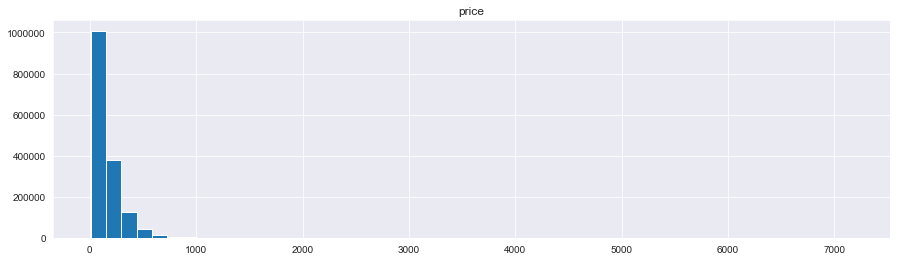

In [30]:
# check price distribution
df_calendar.hist(figsize=(15, 4), bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A1462E248>]],
      dtype=object)

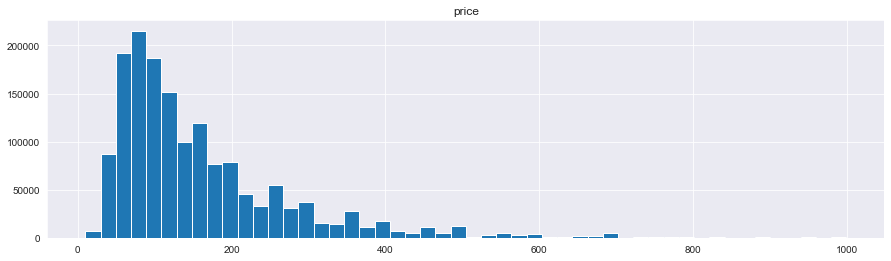

In [31]:
df_calendar[(df_calendar.price < 1000)].hist(figsize=(15, 4), bins=50)

In [32]:
# drop records with price >= $700 (most of the records have price within $700/day)
df_calendar = df_calendar[df_calendar.price < 700]
df_calendar.shape

(1564289, 5)

In [33]:
# add some date variables for each plotting
df_calendar['YEAR'] = df_calendar.date.apply(lambda x: x.strftime('%Y'))
df_calendar['MONTH'] = df_calendar.date.apply(lambda x: x.strftime('%B'))
df_calendar['month'] = df_calendar.date.apply(lambda x: x.strftime('%m'))
df_calendar['WEEKDAY'] = df_calendar.date.apply(lambda x: x.strftime('%A'))
df_calendar['weekday'] = df_calendar.date.apply(lambda x: x.strftime('%w'))
df_calendar['YYYYMM'] = df_calendar['YEAR'] + df_calendar['month']
df_calendar.head()

,city,id,date,available,price,YEAR,MONTH,month,WEEKDAY,weekday,YYYYMM
365,boston,3075044,2017-08-22,t,65.0,2017,August,08,Tuesday,2,201708
366,boston,3075044,2017-08-21,t,65.0,2017,August,08,Monday,1,201708
367,boston,3075044,2017-08-20,t,65.0,2017,August,08,Sunday,0,201708
368,boston,3075044,2017-08-19,t,75.0,2017,August,08,Saturday,6,201708
369,boston,3075044,2017-08-18,t,75.0,2017,August,08,Friday,5,201708


In [34]:
df_calendar['YYYY-MM'] = df_calendar['YEAR'] + '-' + df_calendar['month']
df_calendar['WeekDay'] = df_calendar['weekday'] + '-' + df_calendar['WEEKDAY']
df_calendar.head()

,city,id,date,available,price,YEAR,MONTH,month,WEEKDAY,weekday,YYYYMM,YYYY-MM,WeekDay
365,boston,3075044,2017-08-22,t,65.0,2017,August,08,Tuesday,2,201708,2017-08,2-Tuesday
366,boston,3075044,2017-08-21,t,65.0,2017,August,08,Monday,1,201708,2017-08,1-Monday
367,boston,3075044,2017-08-20,t,65.0,2017,August,08,Sunday,0,201708,2017-08,0-Sunday
368,boston,3075044,2017-08-19,t,75.0,2017,August,08,Saturday,6,201708,2017-08,6-Saturday
369,boston,3075044,2017-08-18,t,75.0,2017,August,08,Friday,5,201708,2017-08,5-Friday


### 1.3a Calculate daily average rental price by city

In [35]:
df_calendar_mean_price_city_date = df_calendar.groupby(['city','date'])['price'].mean()
df_calendar_mean_price_city_date = df_calendar_mean_price_city_date.reset_index()
df_calendar_mean_price_city_date.head()

,city,date,price
0,boston,2016-09-06,235.348673
1,boston,2016-09-07,246.603896
2,boston,2016-09-08,243.106061
3,boston,2016-09-09,253.857438
4,boston,2016-09-10,256.309322


### 1.3b Plot daily average rental price by city

Text(0, 0.5, 'daily average rental price')

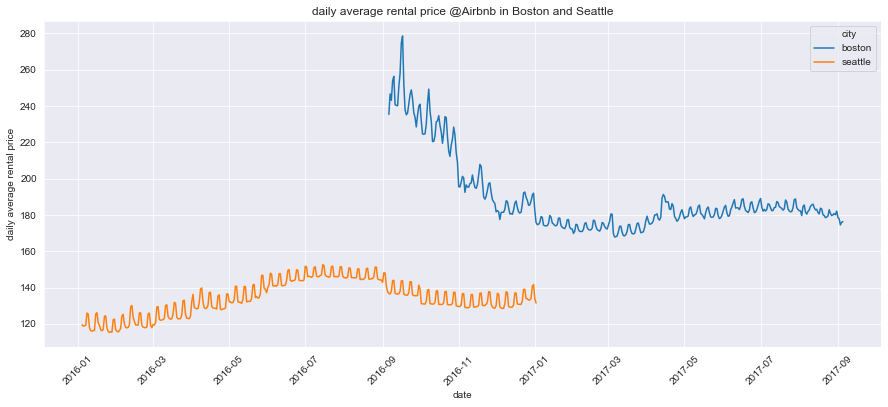

In [36]:
# plot
# https://cmdlinetips.com/2019/04/how-to-specify-colors-to-scatter-plots-in-python/

sns.set_style("darkgrid")
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
sns.lineplot(x=df_calendar_mean_price_city_date.date, 
             y=df_calendar_mean_price_city_date.price, 
             data=df_calendar_mean_price_city_date, hue='city')
plt.title('daily average rental price @Airbnb in Boston and Seattle')
plt.ylabel('daily average rental price')

### 1.4a Calculate monthly average rental price by city

In [37]:
df_calendar_mean_price_city_month = df_calendar.groupby(['city','month'])['price'].mean()
df_calendar_mean_price_city_month = df_calendar_mean_price_city_month.reset_index()
df_calendar_mean_price_city_month_pivot = \
                            df_calendar_mean_price_city_month.pivot(index='month', columns='city', values='price')
df_calendar_mean_price_city_month_pivot['diff'] = df_calendar_mean_price_city_month_pivot.boston - \
                                                  df_calendar_mean_price_city_month_pivot.seattle
df_calendar_mean_price_city_month_pivot

city,boston,seattle,diff
month,,,
01,175.495119,120.379709,55.115410
02,172.960755,120.769052,52.191704
03,172.315801,124.938345,47.377456
04,181.030356,131.498440,49.531916
05,180.740529,135.930507,44.810022
06,183.987053,144.110780,39.876273
07,184.421001,147.912624,36.508377
08,181.883284,146.458517,35.424767
09,226.238506,139.138093,87.100413


### 1.4b-1 Linechart plot monthly average rental price by city

Text(0, 0.5, 'monthly average price $')

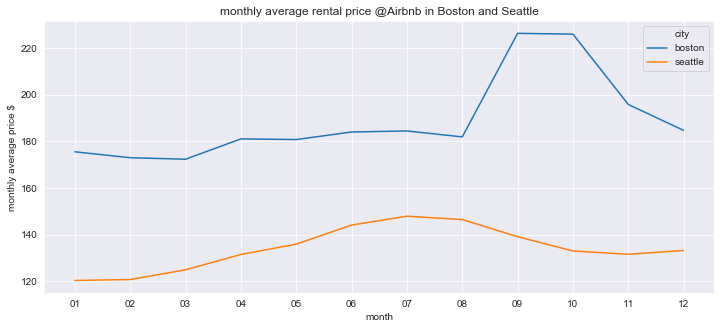

In [38]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,5))
ax = sns.lineplot(x=df_calendar_mean_price_city_month.month, 
                  y=df_calendar_mean_price_city_month.price, 
                  data=df_calendar_mean_price_city_month, hue='city')
plt.title('monthly average rental price @Airbnb in Boston and Seattle')
plt.ylabel('monthly average price $')
# ax.set(title='monthly average rental price @AirBnB in Boston and Seattle', ylabel='monthly average price $')

### 1.4b-2 Barchart plot monthly average rental price by city 

Text(0, 0.5, 'monthly average price $')

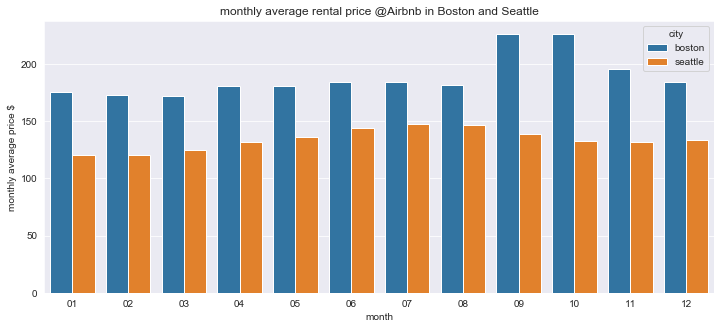

In [39]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,5))
ax = sns.barplot(x=df_calendar_mean_price_city_month.month, 
                 y=df_calendar_mean_price_city_month.price, 
                 data=df_calendar_mean_price_city_month, hue='city')
plt.title('monthly average rental price @Airbnb in Boston and Seattle')
plt.ylabel('monthly average price $')
# plt.ylim(120, 240)

### 1.5a Calculate weekday average rental price by city

In [40]:
df_calendar_mean_price_city_weekday = df_calendar.groupby(['city', 'WeekDay'])['price'].mean()
df_calendar_mean_price_city_weekday = df_calendar_mean_price_city_weekday.reset_index()
df_calendar_mean_price_city_weekday
df_calendar_mean_price_city_weekday_pivot = \
                        df_calendar_mean_price_city_weekday.pivot(index='WeekDay', columns='city', values='price')
df_calendar_mean_price_city_weekday_pivot['diff'] = df_calendar_mean_price_city_weekday_pivot.boston - \
                                                    df_calendar_mean_price_city_weekday_pivot.seattle
df_calendar_mean_price_city_weekday_pivot

city,boston,seattle,diff
WeekDay,,,
0-Sunday,186.678288,132.677756,54.000532
1-Monday,184.874580,131.805800,53.068780
2-Tuesday,184.371507,131.571103,52.800404
3-Wednesday,184.962679,131.681904,53.280775
4-Thursday,186.699843,132.764815,53.935028
5-Friday,190.239257,139.335302,50.903955
6-Saturday,190.523086,139.472621,51.050465


### 1.5b-1 Linechart plot weekday average rental price by city

Text(0, 0.5, 'weekday average price $')

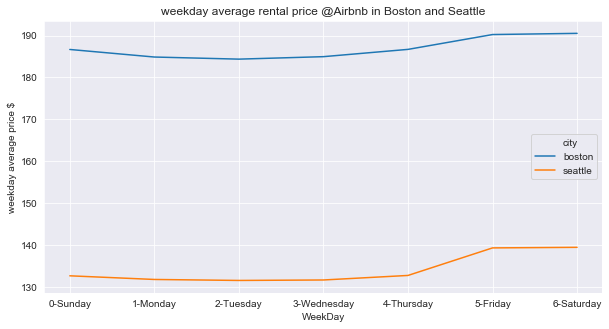

In [41]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
ax = sns.lineplot(x=df_calendar_mean_price_city_weekday.WeekDay, 
                  y=df_calendar_mean_price_city_weekday.price, 
                  data=df_calendar_mean_price_city_weekday, hue='city')
# plt.ylim(120, 210)
plt.title('weekday average rental price @Airbnb in Boston and Seattle')
plt.ylabel('weekday average price $')

### 1.5b-2 Barchart plot weekday average rental price by city

Text(0, 0.5, 'weekday average price $')

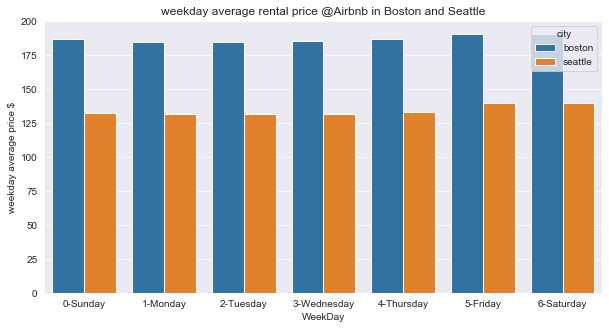

In [42]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df_calendar_mean_price_city_weekday.WeekDay, 
                 y=df_calendar_mean_price_city_weekday.price, 
                 data=df_calendar_mean_price_city_weekday, hue='city')
# plt.ylim(130, 200)
plt.title('weekday average rental price @Airbnb in Boston and Seattle')
plt.ylabel('weekday average price $')

### 1.6 Summary
* Within the same period (Sep 6, 2016 to Jan 2, 2017), daily average rental price (DAR price) is higher in Boston (\\$191) than in Seattle (\\$136).
* DAR price in both Seattle and Boston shows a strong seasonal pattern. 
 * In both cities, DAR price is relatively low at the beginning of the year and gradually increases as the season enters summer. 
 * The months of peak DAR price varies though for each city. In Seattle, DAR price is relatively high from May through September, with June (\\$146), July (\\$150), and August (\\$148) the obvious top three,  more than \\$10 more than the annual average. In Boston, DAR price is relatively high from September through November, with September (\\$229) and October (\\$228) the obvious top two, close to \\$30 more than the annual average.
* DAR price in both Seattle and Boston also shows a strong weekday pattern as shown in the above plot by many small peaks. Each peak cycle corresponds to one week. 
 * In both cities, DAR price is relatively high on Friday and Saturday, close to \\$6~$7 more than the annual average.